In [1]:
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline


In [2]:
nside = 16
npix = hp.nside2npix(nside)
values = hp.sphtfunc.smoothing(np.random.rand(npix), np.radians(30))

Sigma is 764.389620 arcmin (0.222352 rad) 
-> fwhm is 1800.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


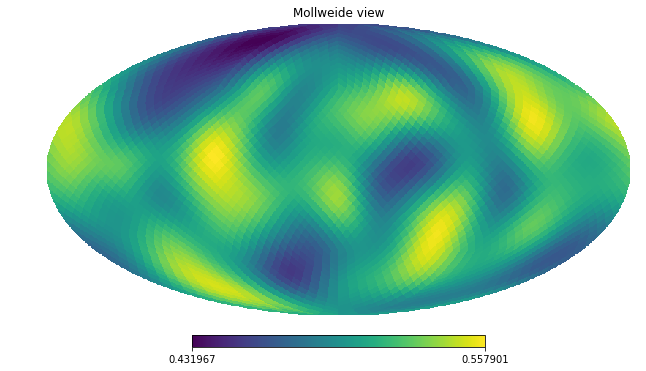

In [3]:
hp.mollview(values)

In [4]:
pix_indx = np.arange(npix)
neighbors = hp.get_all_neighbours(nside, pix_indx)

In [5]:
neighbors[:,[0,2,3]]

array([[ 4,  8, 10],
       [11,  7,  9],
       [ 3,  1,  2],
       [ 2,  0,  1],
       [ 1,  3,  0],
       [ 6, 10,  4],
       [ 5,  9, 11],
       [13, 19, 22]])

In [6]:
def hp_grow_sort(in_map, ignore_nan=True):
    """Find the maximum of a healpix map, then grow selecting the largest neighbor.
    """
    
    nside = hp.npix2nside(np.size(in_map))
    npix = np.size(in_map)
    pix_indx = np.arange(npix)
    
    if ignore_nan:
        not_nan_pix = ~np.isnan(in_map)
        npix = np.size(in_map[not_nan_pix])
        pix_indx = pix_indx[not_nan_pix]
    
    # Make a boolean area to keep track of which pixels still need to be sorted
    neighbors = hp.get_all_neighbours(nside, pix_indx)
    valid_neighbors_mask = np.ones(neighbors.shape, dtype=bool)
    
    ordered_hp = np.zeros(npix, dtype=int)
    current_max = np.where(in_map == np.max(in_map))[0].min()

    ordered_hp[0] = current_max
    #neighbors_of_current = neighbors[:,current_max]
    
    valid_neighbors_mask[np.where(neighbors == current_max)] = False
    #valid_neighbors_mask[:,neighbors_of_current][np.where(neighbors[:,neighbors_of_current] == current_max)] = False
    
    for i in np.arange(1, npix):
        current_neighbors = neighbors[:, ordered_hp[0:i]][valid_neighbors_mask[:, ordered_hp[0:i]]]
        current_max = current_neighbors[np.where(in_map[current_neighbors] == np.max(in_map[current_neighbors]))[0].min()]
        ordered_hp[i] = current_max
        # current_max is no longer a valid neighbor to consider
        valid_neighbors_mask[np.where(neighbors == current_max)] = False
        #neighbors_of_current = neighbors[:,current_max]
        #valid_neighbors_mask[:,neighbors_of_current][np.where(neighbors[:,neighbors_of_current] == current_max)] = False
  

    return ordered_hp

In [7]:
# Let's try and transpose things

def hp_grow_sort(in_map, ignore_nan=True):
    """Find the maximum of a healpix map, then grow selecting the largest neighbor.
    """
    nside = hp.npix2nside(np.size(in_map))
    npix = np.size(in_map)
    pix_indx = np.arange(npix)
    
    if ignore_nan:
        not_nan_pix = ~np.isnan(in_map)
        npix = np.size(in_map[not_nan_pix])
        pix_indx = pix_indx[not_nan_pix]
    
    # Make a boolean area to keep track of which pixels still need to be sorted
    neighbors = hp.get_all_neighbours(nside, pix_indx).T
    valid_neighbors_mask = np.ones(neighbors.shape, dtype=bool)
    
    # Sometimes there can be no neighbors in some directions
    valid_neighbors_mask[np.where(neighbors == -1)] = False
    
    ordered_hp = np.zeros(npix, dtype=int)
    current_max = np.where(in_map == np.max(in_map))[0].min()

    ordered_hp[0] = current_max

    #valid_neighbors_mask[np.where(neighbors == current_max)] = False
    current_neighbors = neighbors[current_max][valid_neighbors_mask[current_max]]
    sub_indx = np.where(neighbors[current_neighbors] == current_max)
    valid_neighbors_mask[(current_neighbors[sub_indx[0]], sub_indx[1])] = False
    
    for i in np.arange(1, npix):
        current_neighbors = neighbors[ordered_hp[0:i]][valid_neighbors_mask[ordered_hp[0:i]]]
        current_max = current_neighbors[np.where(in_map[current_neighbors] == np.max(in_map[current_neighbors]))[0].min()]
        ordered_hp[i] = current_max
        # current_max is no longer a valid neighbor to consider
        #valid_neighbors_mask[np.where(neighbors == current_max)] = False
        
        neighbors_of_current = neighbors[current_max]
        sub_indx = np.where(neighbors[neighbors_of_current] == current_max)
        valid_neighbors_mask[(neighbors_of_current[sub_indx[0]], sub_indx[1])] = False
        
    return ordered_hp

In [8]:
test = hp_grow_sort(values)

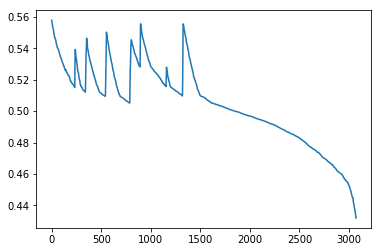

In [9]:
plt.plot(values[test])

In [10]:
test

array([1389, 1326, 1261, ...,   92,   45,   66])

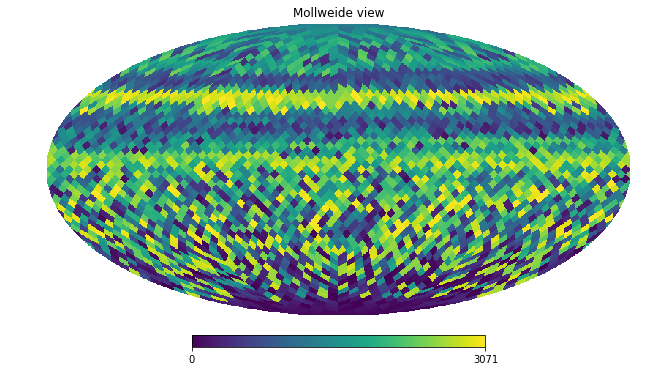

In [11]:
hp.mollview(np.array(test, dtype=float))

In [12]:
in_map = values
nside = hp.npix2nside(np.size(in_map))
npix = np.size(in_map)
pix_indx = np.arange(npix)

# Make a boolean area to keep track of which pixels still need to be sorted
neighbors = hp.get_all_neighbours(nside, pix_indx).T
valid_neighbors_mask = np.ones(neighbors.shape, dtype=bool)

ordered_hp = np.zeros(npix, dtype=int)
current_max = np.where(in_map == np.max(in_map))[0].min()

ordered_hp[0] = current_max

#valid_neighbors_mask[np.where(neighbors == current_max)] = False
neighbors_of_current = neighbors[current_max]
sub_indx = np.where(neighbors[neighbors_of_current] == current_max)
valid_neighbors_mask[(neighbors_of_current[sub_indx[0]], sub_indx[1])] = False
for i in np.arange(1, 1000):
        current_neighbors = neighbors[ordered_hp[0:i]][valid_neighbors_mask[ordered_hp[0:i]]]
        current_max = current_neighbors[np.where(in_map[current_neighbors] == np.max(in_map[current_neighbors]))[0].min()]
        ordered_hp[i] = current_max
        # current_max is no longer a valid neighbor to consider
        #valid_neighbors_mask[np.where(neighbors == current_max)] = False
        neighbors_of_current = neighbors[current_max]
        sub_indx = np.where(neighbors[neighbors_of_current] == current_max)
        valid_neighbors_mask[(neighbors_of_current[sub_indx[0]], sub_indx[1])] = False


In [13]:
np.where(in_map[current_neighbors] == np.max(in_map[current_neighbors]))

(array([733, 735, 744, 790]),)

In [14]:
in_map[current_neighbors].max()

0.528651412325327

In [15]:
np.where(in_map[current_neighbors] == np.max(in_map[current_neighbors]))

(array([733, 735, 744, 790]),)

In [16]:
in_map[np.where(in_map[current_neighbors] == np.max(in_map[current_neighbors]))]

array([0.53256135, 0.5261779 , 0.50726549, 0.53703524])

In [17]:
ordered_hp

array([1389, 1326, 1261, ...,    0,    0,    0])

In [18]:
neighbors[final_indx]

NameError: name 'final_indx' is not defined